<a href="https://colab.research.google.com/github/edaislam/ML-Assignment1/blob/main/CNG409_PA1_2585081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Exploratory Data Analysis**

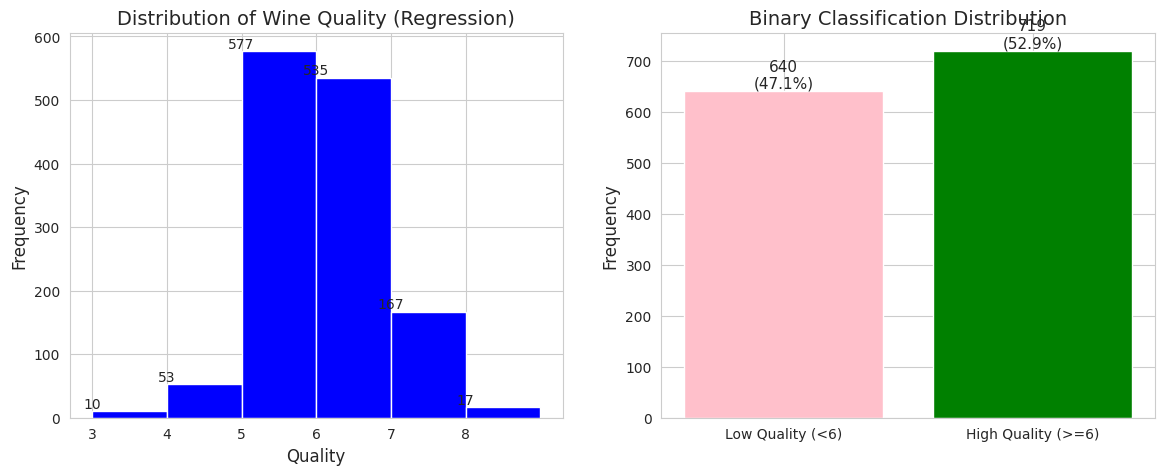

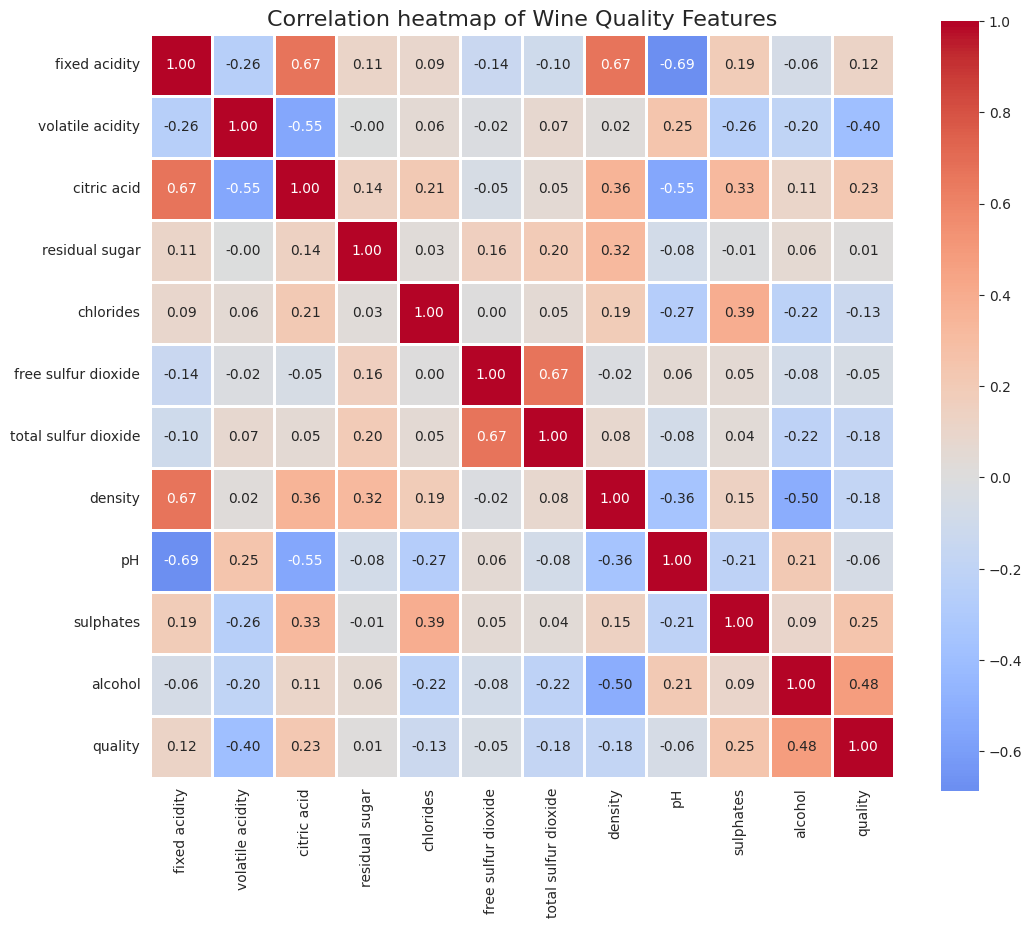

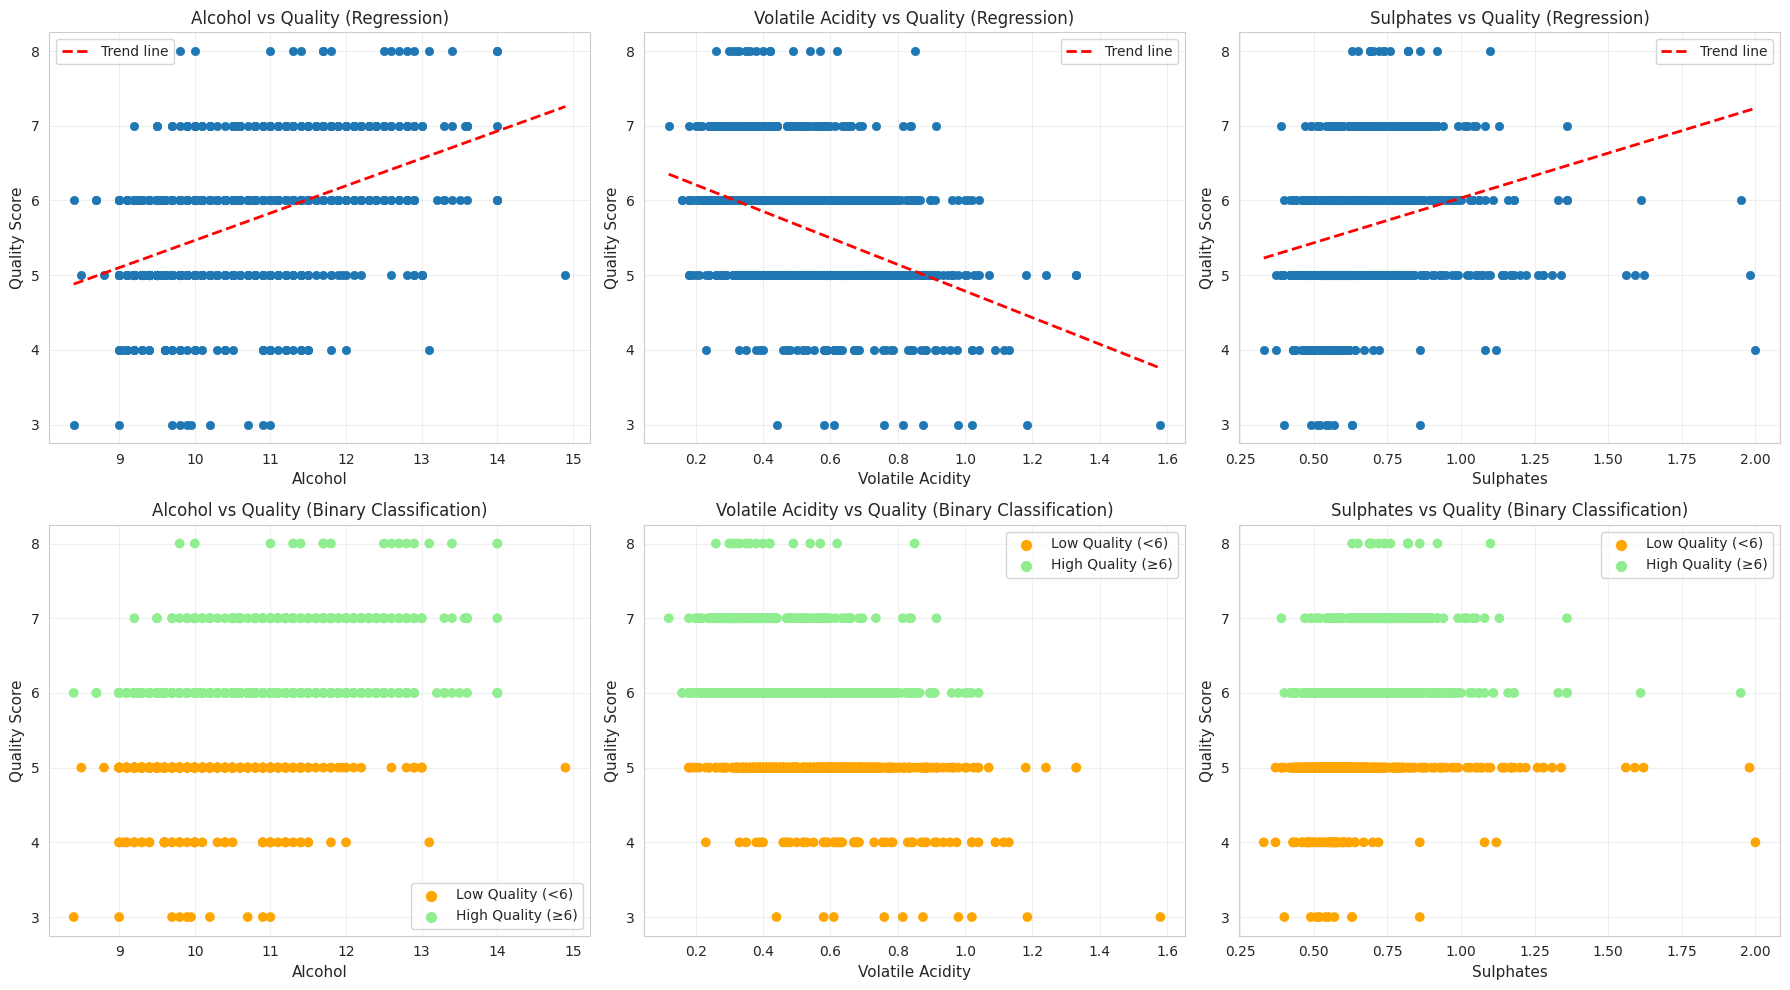

In [66]:
# At the START of your notebook
import sys
from io import StringIO

# Capture all outputs
captured_output = StringIO()
sys.stdout = captured_output


print("Exploratory Data Analysis\n")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
dataFile = pd.read_csv('winequality-red.csv',sep=';')
summary_stats = dataFile.describe().T[['mean','std', 'min', 'max']]
print("\n------ SUMMARY STATISTICS ------")
print(summary_stats)
print("""\n
Summary Statistics: The dataset contains 1599 wine samples with 11 different features.
The target variable is the quality of these wines. Table shows the mean, standard deviation,
min and max values for all the features. There are no missing values. There are 240 duplicated
rows, duplicated values are founded and removed by keeping the first one.
Cleaned dataset contains 1359. There are no negative values in the data.\n""")
missing_vals = dataFile.isnull().sum()
#print(missing_vals)
#print(f"\nTotal number of the Missing Values: {missing_vals.sum()}")
duplicated_values = dataFile.duplicated().sum()
#print(f"\nTotal number of duplicated values: {duplicated_values}")
"""if duplicated_values > 0:
  print("\nDuplicated Values: ")
  print(dataFile[dataFile.duplicated(keep=False)])  #show all the duplicated values (keep=false)"""
#handle missing and duplicated values
if missing_vals.sum() > 0:
  dataFile = dataFile.dropna()
if duplicated_values > 0:
  dataFile = dataFile.drop_duplicates(keep='first')
#handle inconsistent values
#check for negative values
for col in dataFile.columns:
  if (dataFile[col] < 0).any():
    print(f"WARNING: {col} has negative values!")
#---------------------------------------------------------------------------------
#task1_2 target variable analysis
sns.set_style("whitegrid")
#figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  #1 row 2 col
#first table: distribution of quality for regression
axes[0].hist(dataFile['quality'], bins=range(3, 10), color='blue')  #histogram graph
axes[0].set_xlabel('Quality', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Wine Quality (Regression)', fontsize=14)
axes[0].set_xticks(range(3, 9))   #set the tick marks (x axis points)
#adding the count labels
for i in range(3, 9):
    count = len(dataFile[dataFile['quality'] == i])
    if count > 0:
        axes[0].text(i, count, str(count), ha='center', va='bottom') #x=i and y=count
#second table: distrubution of quality for binary
#calculate low and high quality (quality>= 6 vs quality < 6)
low_quality_count = len(dataFile[dataFile['quality'] < 6])
high_quality_count = len(dataFile[dataFile['quality'] >= 6])

# Plot the bar chart
axes[1].bar(['Low Quality (<6)', 'High Quality (>=6)'],[low_quality_count, high_quality_count],color=['pink', 'green'])
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Binary Classification Distribution', fontsize=14)

# Add count labels on bars
for i, count in enumerate([low_quality_count, high_quality_count]):
    axes[1].text(i, count, f'{count}\n({count/len(dataFile)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11)
plt.show()
print("""\n
Target Variable Analysis: This table shows the distrubiton of the wine quality.
When we question the suitability of regression, the quaility ranges from 3 to 8
thus we can say that there is variability. But most samples concentrated in the
middle range (5-6) and this may lead to models to predict average quality more
accuretly than extreme values. When we look at the table 3 which represents binary
classification of the quality distribution, there 640 low quality wines and 719 high
quality wines. They are almost equal thus we can say that the model is suitable for
binary classification.
""")
#correlation matrix
correlation_matrix = dataFile.corr()
#create the corr heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
#coolwarm meaing: blues for low and reds for high
plt.title('Correlation heatmap of Wine Quality Features', fontsize=16)
plt.show()
print("""\n
This table shows the correlation between all the features and the target variable (quality).
Alcohol has +0.480 correlation value thus it is the strongest positive correlation.
Using this we can say that wines with higher alcohol percentage are tend to have higher
quality values. Volatile Acidity has a correlation value -0.395 thus it is the strongest
negative correlation with quality of the wine. By that, we can say that higher volatile
acidity means with lower quality value.
Relevance for Regression Models: Fetaures that has stronger correlations such as alcohol
and volatile acidity are more important predictors in regression models.
Relevance for tree models: Decision trees can be used with both linear and non-linear
relationships. Decision trees may also identify important interactions between weakly
correlated features.
\n""")

#highliht which features are most correlated with quality
corr_quality = correlation_matrix['quality'].sort_values(ascending=False)
print("\n------ correlation with quality -----------\n")
print(corr_quality)

#-----------------------------------------------------------------------
#Feature–Target Relationships:
#select 3 representative features
features = ['alcohol', 'volatile acidity', 'sulphates']
#binary labels for every row accroding to quality
binary_labels = (dataFile['quality'] >= 6).astype(int)
colors = ['orange' if label == 0 else 'lightgreen' for label in binary_labels]
#3 colums and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

#row 1: scatterplot for regression
for index, feature in enumerate(features):
    axes[0, index].scatter(dataFile[feature], dataFile['quality'], linewidth=0.5)
    axes[0, index].set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[0, index].set_ylabel('Quality Score', fontsize=11)
    axes[0, index].set_title(f'{feature.replace("_", " ").title()} vs Quality (Regression)',fontsize=12)
    axes[0, index].grid(alpha=0.3)

    # calculate slope and intercept
    x = dataFile[feature].values
    y = dataFile['quality'].values
    x_average = np.mean(x)
    y_average = np.mean(y)
    slope = np.sum((x - x_average) * (y - y_average)) / np.sum((x - x_average) ** 2)
    intercept = y_average - slope * x_average
    x_min = x.min()
    x_max = x.max()
    y_min = slope * x_min + intercept
    y_max = slope * x_max + intercept
    axes[0, index].plot([x_min, x_max], [y_min, y_max], "r--", linewidth=2, label='Trend line')
    axes[0, index].legend()

# Row 2: Scatterplots with binary classification color coding
for index, feature in enumerate(features):
    scatter = axes[1, index].scatter(dataFile[feature], dataFile['quality'], c=colors)
    axes[1, index].set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[1, index].set_ylabel('Quality Score', fontsize=11)
    axes[1, index].set_title(f'{feature.replace("_", " ").title()} vs Quality (Binary Classification)',
                          fontsize=12)
    axes[1, index].grid(alpha=0.3)
    axes[1, index].scatter([], [], c='orange', label='Low Quality (<6)', s=50)
    axes[1, index].scatter([], [], c='lightgreen', label='High Quality (≥6)', s=50)
    axes[1, index].legend()


plt.tight_layout()
plt.show()
print("""\nFeature-Target Relationships: This table represents scatterplots for three
representatine features. As representative features I chosed alcohol, volatile acidity
and sulphates since they have the highest correlations. As we can see from the table,
Alcohol demonstrates the best class seperation followed by volatile acidity which clearly
shows negative relationship with quality. These features would appear closer to the root
of decision trees. Sulphates shows less seperation thus it would appear deeper in the tree.\n""")





**Summary Statistics:** The dataset contains 1599 wine samples with 11 different features. The target variable is the quality of these wines. Table shows the mean, standard deviation, min and max values for all the features. There are no missing values. There are 240 duplicated rows, duplicated values are founded and removed by keeping the first occurence. Cleaned dataset contains 1359. All the values in the dataset are within the expected range and there are no negative values detected.  


---


**Target Variable Analysis:** This table shows the distrubiton of the wine quality. When we question the suitability of regression, the quaility ranges from 3 to 8 thus we can say that there is variability. But most samples concentrated in the middle range (5-6) and this may lead to models to predict average quality more accuretly than extreme values. When we look at the table 3 which represents binary classification of the quality distribution, there 640 low quality wines and 719 high quality wines. They are almost equal thus we can say that the model is suitable for binary classification.


---


**Correlation Heatmap:** This table shows the correlation between all the features and the target variable (quality). Alcohol has +0.480 correlation value thus it is the strongest positive correlation. Using this we can say that wines with higher alcohol percentage are tend to have higher quality values. Volatile Acidity has a correlation value -0.395 thus it is the strongest negative correlation with quality of the wine. By that, we can say that higher volatile acidity means with lower quality value.
Relevance for Regression Models: Fetaures that has stronger correlations such as alcohol and volatile acidity are more important predictors in regression models.  
Relevance for tree models: Decision trees can be used with both linear and non-linear relationships. Decision trees may also identify important interactions between weakly correlated features.



---



**Feature-Target Relationships:** This table represents scatterplots for three representatine features. As representative features I chosed alcohol, volatile acidity and sulphates since they have the highest correlations. As we can see from the table, Alcohol demonstrates the best class seperation followed by volatile acidity which clearly shows negative relationship with quality. These features would appear closer to the root of decision trees. Sulphates shows less seperation thus it would appear deeper in the tree.

**Task 2: Regression and Classification**
2.1 Linear Regression

---



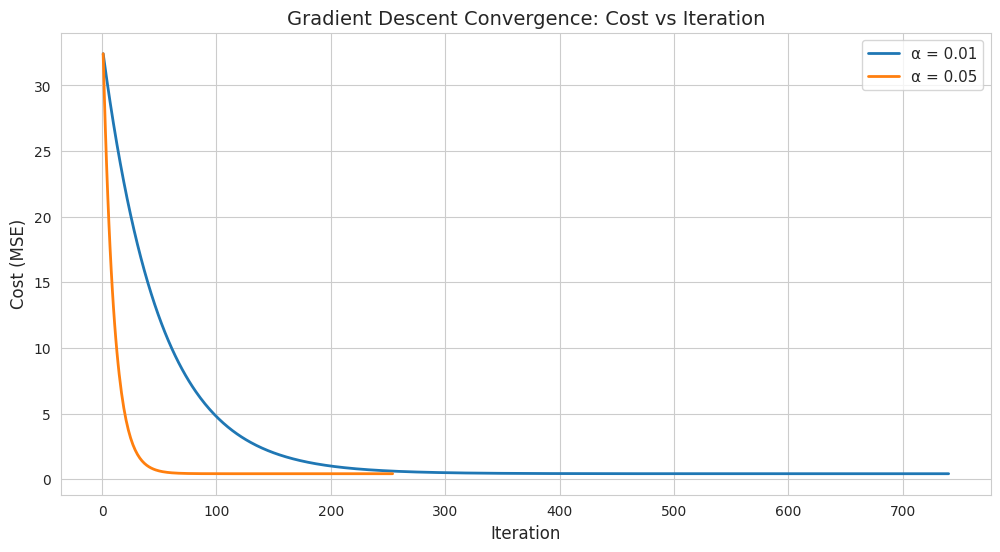

In [67]:
print("\nLinear Regression\n")
#set random feed
np.random.seed(409)
#seperate the files as X and Y
X = dataFile.drop('quality', axis=1).values #all 11 features
Y = dataFile['quality'].values #target variable

#split the dataset
samples = len(X)
indices = np.random.permutation(samples)  #to order them differently
train_data_size = int(0.70 * samples)
val_data_size = int(0.15 * samples)
test_data_size = samples - train_data_size - val_data_size

train_data_index = indices[:train_data_size]
val_data_index = indices[train_data_size:train_data_size+val_data_size]
test_data_index = indices[train_data_size + val_data_size:]

X_train, y_train = X[train_data_index], Y[train_data_index]
X_val, y_val = X[val_data_index], Y[val_data_index]
X_test, y_test = X[test_data_index], Y[test_data_index]

#calculate mean
trainData_mean = np.mean(X_train, axis=0)
trainData_std = np.std(X_train, axis=0)

#Standardise features (z-score) using statistics computed on the training set only
X_train_standardised = (X_train - trainData_mean) / trainData_std
X_val_standardised = (X_val - trainData_mean) / trainData_std
X_test_standardised = (X_test - trainData_mean) / trainData_std

#Add an explicit bias term to the design matrix (prepend a column of ones)
numberOf_wines = X_train_standardised.shape[0]
ones_column = np.ones((numberOf_wines, 1))
trainDataX_bias = np.hstack([ones_column, X_train_standardised])
num_val = X_val_standardised.shape[0]
valDataX_bias = np.hstack([np.ones((num_val, 1)), X_val_standardised])
num_test = X_test_standardised.shape[0]
testDataX_bias = np.hstack([np.ones((num_test, 1)), X_test_standardised])


#helper functions
def compute_mse(real_y, estimated_y):
  #calculate mean squared error
  return np.mean((real_y - estimated_y) ** 2)

def compute_rmse(real_y, estimated_y):
  #calculate root mean squared error
  return np.sqrt(compute_mse(real_y, estimated_y))

def compute_r2(real_y, estimated_y):
    #Calculate R-squared
    ss_res = np.sum((real_y - estimated_y) ** 2)
    ss_tot = np.sum((real_y - np.mean(real_y)) ** 2)
    return 1 - (ss_res / ss_tot)

def predict(X, beta):  #matrix multiplication
    """Make predictions"""
    return X @ beta

#------------------------------------------------------------------------------
#Normal Equation Solution.
print("\n----------------NORMAL EQUATION SOLUTION-----------------\n")

#computing the beta (β)
#(X^T)X
X_T_X = trainDataX_bias.T @ trainDataX_bias
#pseudoinverse of (X^T)X
X_T_X_pinv = np.linalg.pinv(X_T_X)
#(X^T)y
X_T_y = trainDataX_bias.T @ y_train
#β = ((X^T)X) @ (X^T)y
beta_normal = X_T_X_pinv @ X_T_y

#predictions
trainData_estimatedY = predict(trainDataX_bias, beta_normal)
valData_estimatedY = predict(valDataX_bias, beta_normal)
testData_estimatedY = predict(testDataX_bias, beta_normal)

#evaluation of MSE, RMSE, and R^2 for normal equation
train_mse_normal = compute_mse(y_train, trainData_estimatedY)
train_rmse_normal = compute_rmse(y_train, trainData_estimatedY)
train_r2_normal = compute_r2(y_train, trainData_estimatedY)
val_mse_normal = compute_mse(y_val, valData_estimatedY)
val_rmse_normal = compute_rmse(y_val, valData_estimatedY)
val_r2_normal = compute_r2(y_val, valData_estimatedY)
test_mse_normal = compute_mse(y_test, testData_estimatedY)
test_rmse_normal = compute_rmse(y_test, testData_estimatedY)
test_r2_normal = compute_r2(y_test, testData_estimatedY)
#print the results
print(f"\nNormal Equation Results:")
print(f"  Train - MSE: {train_mse_normal:.4f}, RMSE: {train_rmse_normal:.4f}, R²: {train_r2_normal:.4f}")
print(f"  Val   - MSE: {val_mse_normal:.4f}, RMSE: {val_rmse_normal:.4f}, R²: {val_r2_normal:.4f}")
print(f"  Test  - MSE: {test_mse_normal:.4f}, RMSE: {test_rmse_normal:.4f}, R²: {test_r2_normal:.4f}")

#------------------------------------------------------------------
#step3 Gradient Descent Solution
print("\n----------------Gradient Descent Solution-----------------\n")

def gradient_descent(train_X, train_Y, learning_rate=0.01, max_iterations=10000, epsilon=1e-6):
    #Implement batch gradient descent with the update
    n_samples, n_features = train_X.shape #number of samples, number of features
    beta = np.zeros(n_features)  #beta starts with 0's
    cost_history = []

    for iteration in range(max_iterations):
        predicted_Y = predict(train_X, beta)
        #compute cost
        cost = compute_mse(train_Y, predicted_Y)
        cost_history.append(cost)

        # Compute gradient: dJ/dβ = (1/n) * X^T * (Xβ - y)
        gradient = (1/n_samples) * train_X.T @ (predicted_Y - train_Y)

        # Update parameters
        beta = beta - learning_rate * gradient

        # Early stopping
        if iteration >= 2:
            cost_change_1 = abs(cost_history[-1] - cost_history[-2]) # |J(t) − J(t − 1)|
            cost_change_2 = abs(cost_history[-2] - cost_history[-3])
            # If the cost hasn’t changed much for two consecutive steps, stop
            if cost_change_1 < epsilon and cost_change_2 < epsilon:
                print(f"  Converged at iteration {iteration+1}")
                break

    return beta, cost_history

#two distinct learning rates (e.g., α ∈ {0.01, 0.05})
learning_rates = [0.01, 0.05]
gradient_descent_results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate α = {lr}:")
    #learned beta = weights after convergence, MSE history of iterations
    weights, cost_history = gradient_descent(trainDataX_bias, y_train, learning_rate=lr, max_iterations=10000, epsilon=1e-6)
    #predicting outcomes for train, validation, and test sets using learned β
    y_train_pred_gd = predict(trainDataX_bias, weights)
    y_val_pred_gd = predict(valDataX_bias, weights)
    y_test_pred_gd = predict(testDataX_bias, weights)

    # Evaluation
    train_mse_gd = compute_mse(y_train, y_train_pred_gd)
    train_rmse_gd = compute_rmse(y_train, y_train_pred_gd)
    train_r2_gd = compute_r2(y_train, y_train_pred_gd)

    val_mse_gd = compute_mse(y_val, y_val_pred_gd)
    val_rmse_gd = compute_rmse(y_val, y_val_pred_gd)
    val_r2_gd = compute_r2(y_val, y_val_pred_gd)

    test_mse_gd = compute_mse(y_test, y_test_pred_gd)
    test_rmse_gd = compute_rmse(y_test, y_test_pred_gd)
    test_r2_gd = compute_r2(y_test, y_test_pred_gd)

    gradient_descent_results[lr] = {
        'beta': weights,    #learned parameters
        'cost_history': cost_history,
        'train_mse': train_mse_gd,
        'train_rmse': train_rmse_gd,
        'train_r2': train_r2_gd,
        'val_mse': val_mse_gd,
        'val_rmse': val_rmse_gd,
        'val_r2': val_r2_gd,
        'test_mse': test_mse_gd,
        'test_rmse': test_rmse_gd,
        'test_r2': test_r2_gd
    }

    print(f"  Final cost: {cost_history[-1]:.4f} after {len(cost_history)} iterations")
    print(f"  Train - MSE: {train_mse_gd:.4f}, RMSE: {train_rmse_gd:.4f}, R^2: {train_r2_gd:.4f}")
    print(f"  Val   - MSE: {val_mse_gd:.4f}, RMSE: {val_rmse_gd:.4f}, R^2: {val_r2_gd:.4f}")
    print(f"  Test  - MSE: {test_mse_gd:.4f}, RMSE: {test_rmse_gd:.4f}, R^2: {test_r2_gd:.4f}")

#plot the convergence plot
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    cost_history = gradient_descent_results[lr]['cost_history']
    plt.plot(range(1, len(cost_history)+1), cost_history, label=f'α = {lr}', linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.title('Gradient Descent Convergence: Cost vs Iteration', fontsize=14)
plt.legend(fontsize=11)
plt.show()

print("""
This graph shows cost vs iteration value of two different learning rates. When learning rate = 0.05 the model converges faster
because it causes larger steps. Learning rate 0.05 has less cost (Rsquare value) thus it is better
than 0.01.
""")

#Step4 : reporting ---------------------------------------------------------------------

print("\n---------FINAL RESULTS SUMMARY-----------\n")

# Determine best learning rate based on validation performance
best_lr = min(learning_rates, key=lambda lr: gradient_descent_results[lr]['val_mse'])
print(f"\nBest learning rate based on validation MSE: α = {best_lr}")

# Create results table
results_data = {
    'Method': ['Normal Equation', 'Normal Equation', 'Normal Equation',
               f'Gradient Descent (α={best_lr})', f'Gradient Descent (α={best_lr})', f'Gradient Descent (α={best_lr})'],
    'Set': ['Train', 'Validation', 'Test', 'Train', 'Validation', 'Test'],
    'MSE': [train_mse_normal, val_mse_normal, test_mse_normal,
            gradient_descent_results[best_lr]['train_mse'], gradient_descent_results[best_lr]['val_mse'], gradient_descent_results[best_lr]['test_mse']],
    'RMSE': [train_rmse_normal, val_rmse_normal, test_rmse_normal,
             gradient_descent_results[best_lr]['train_rmse'], gradient_descent_results[best_lr]['val_rmse'], gradient_descent_results[best_lr]['test_rmse']],
    'R²': [train_r2_normal, val_r2_normal, test_r2_normal,
           gradient_descent_results[best_lr]['train_r2'], gradient_descent_results[best_lr]['val_r2'], gradient_descent_results[best_lr]['test_r2']]
}

results_df = pd.DataFrame(results_data)
print("\n", results_df.to_string(index=False))
print("""
When learning rate is 0.05 the model converges faster because 0.05>0.01 and thus step size is also greater.
when step size is greater number of iterations are less while convergence.
Model doesn't show overfitting as traning, validation and test R-square values are approximate to each other.
""")


**Task 2.1 Linear Regression Implementation**


When learning rate is 0.05 the model converges faster because 0.05>0.01 and thus step size is also greater.
when step size is greater number of iterations are less while convergence.  
Model doesn't show overfitting as traning, validation and test R-square values are approximate to each other.

**Task 2: Regression and Classification**
2.2 Logistic Regression Implementation

---



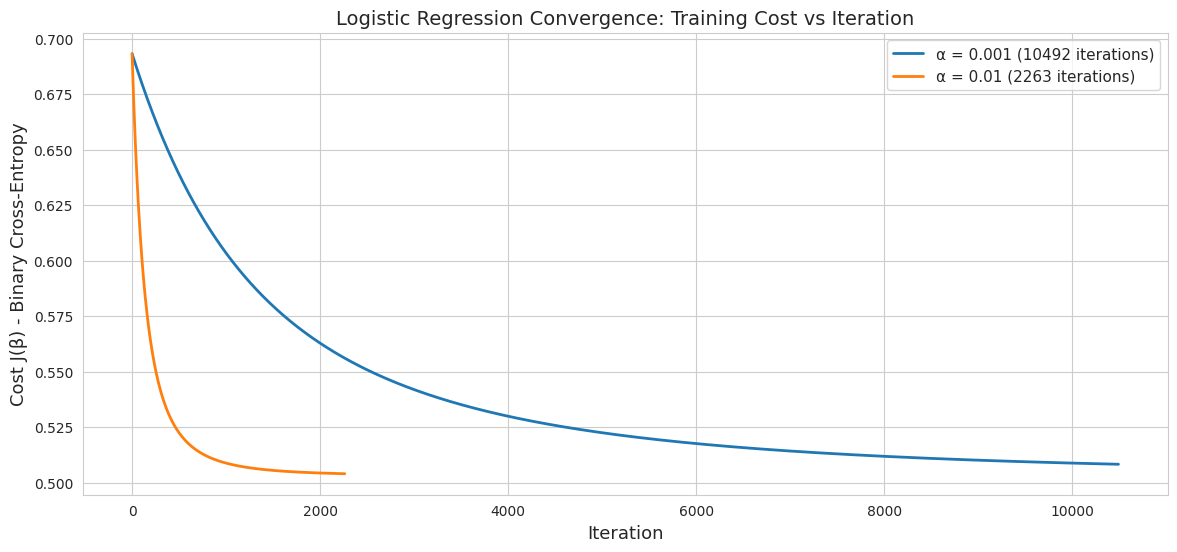

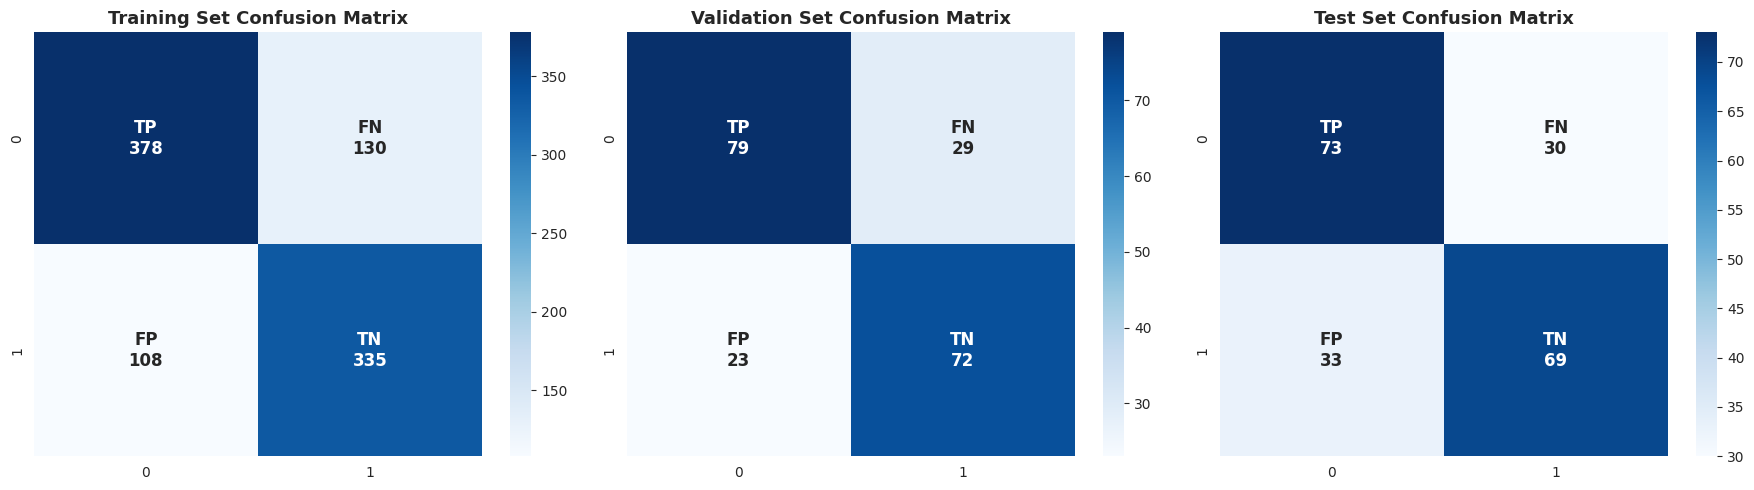

In [68]:
#Binary target construction and preprocessing
print("\n--------Logistic Regression - Binary Classification----------\n")
#converting to binary labels
train_y_bin = (y_train >= 6).astype(int)
val_y_bin = (y_val >= 6).astype(int)
test_y_bin = (y_test >= 6).astype(int)

#functions
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def log_regression_prediction(X, beta):
  z = X @ beta
  return sigmoid_function(z)

def binary_prediction(X, beta, threshold=0.5):
  probs = log_regression_prediction(X, beta)
  # Convert to 0 or 1
  binary_labels = (probs >= threshold) * 1
  return binary_labels

def bin_cross_entropy_loss(true_y, pred_y):
    epsilon = 0.0000000000001
    n = len(true_y)
    total_loss = 0

    for i in range(n):
        y = true_y[i]
        y_pred = pred_y[i]

        # Make sure y_pred is not 0 or 1
        y_pred = max(epsilon, min(y_pred, 1 - epsilon))

        # Calculate loss for this sample
        if y == 1:
            sample_loss = -np.log(y_pred)
        else:
            sample_loss = -np.log(1 - y_pred)

        total_loss += sample_loss

    loss = total_loss / n
    return loss

#Gradient Descent optimisation.
def logistic_gradient_descent(train_X, train_Y, learning_rate=0.01, max_iterations=50000, epsilon=1e-6):
  n_samples, n_features = train_X.shape
  betaTemp = np.zeros(n_features)
  costHistory = []
  for iteration in range(max_iterations):
    pred_y = log_regression_prediction(train_X, betaTemp)
    cost = bin_cross_entropy_loss(train_Y, pred_y)
    costHistory.append(cost)
    #gradient = (1/n) * X^T (transpose) * (ŷ - y)
    gradient = (1 / n_samples) * train_X.T @ (pred_y- train_Y)
    # Update parameters: β ← β - α * gradient
    betaTemp = betaTemp - learning_rate * gradient
    #Stop early if the absolute change in cost |J(t) − J(t − 1)| falls below ε = 10−6 for two consecutive iterations.
    if iteration >= 2:  #2 consecutive iterations
        cost_change_1 = abs(costHistory[-1] - costHistory[-2])
        cost_change_2 = abs(costHistory[-2] - costHistory[-3])

        if cost_change_1 < epsilon and cost_change_2 < epsilon:  #if both are less than epsilon
            break
  else:
      print("Reached maximum iterations")

  return betaTemp, costHistory

print("\n---------Gradient Descent Optimzation-----------\n")
# Train with multiple learning rates
learning_rates = [0.001, 0.01]
logisticReg_results = {}
for lr in learning_rates:
    print("Learning rate α = ",lr)
    #train model
    beta_logistic, costHistory = logistic_gradient_descent(
        trainDataX_bias,
        train_y_bin,
        learning_rate=lr,
        max_iterations=50000,
        epsilon=1e-6
    )
    print(f"Initial cost: {costHistory[0]:.6f}")
    print(f"Final cost: {costHistory[-1]:.6f}")
    #store results
    logisticReg_results[lr] = {
        'beta': beta_logistic,
        'cost_history': costHistory,
        'iterations': len(costHistory)
    }
#plot the training cost versus iteration number for both learning rates on the same graph.
print("\n-----------CONVERGENCE PLOT-----------\n")
plt.figure(figsize=(14, 6))
for lr in learning_rates:
    cost_history = logisticReg_results[lr]['cost_history']
    iterations = len(cost_history)

    plt.plot(range(1, iterations + 1), cost_history,
             label=f'α = {lr} ({iterations} iterations)',
             linewidth=2)
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Cost J(β) - Binary Cross-Entropy', fontsize=13)
plt.title('Logistic Regression Convergence: Training Cost vs Iteration',fontsize=14)
plt.legend(fontsize=11, loc='upper right')
plt.show()

#evaluation part
print("\n-----------EVALUATION-----------\n")
#compute predictions on the validation and test sets using a threshold of 0.5.
def confusion_matrix(true_y, pred_y):
    TP = np.sum((true_y == 1) & (pred_y == 1)) #true positive
    TN = np.sum((true_y == 0) & (pred_y == 0)) #false negative
    FP = np.sum((true_y == 0) & (pred_y == 1)) #false positive
    FN = np.sum((true_y == 1) & (pred_y == 0)) #true negative
    return np.array([[TN, FP], [FN, TP]])

def calculate_metrics(true_y, pred_y):
    confusion_matrix_ = confusion_matrix(true_y, pred_y)
    TN, FP = confusion_matrix_[0]
    FN, TP = confusion_matrix_[1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)

    return {
        'confusion_matrix': confusion_matrix_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN
    }
best_model = None
lowest_cost = 1
for lr in learning_rates:
    final_cost = logisticReg_results[lr]['cost_history'][-1]
    if final_cost < lowest_cost:
        lowest_cost = final_cost
        best_model = lr
print(f"Best learning rate: {best_model}")

beta_best = logisticReg_results[best_model]['beta']

#make predictions (threshold = 0.5)
train_pred = binary_prediction(trainDataX_bias, beta_best, threshold=0.5)
val_pred = binary_prediction(valDataX_bias, beta_best, threshold=0.5)
test_pred = binary_prediction(testDataX_bias, beta_best, threshold=0.5)

#calculate metrics
train_metrics = calculate_metrics(train_y_bin, train_pred)
val_metrics = calculate_metrics(val_y_bin, val_pred)
test_metrics = calculate_metrics(test_y_bin, test_pred)

#present the confusion matrix (numeric or heatmap form) and the metric values in a clear table.
print("\n-----------CONFUSION MATRIX RESULTS -----------\n")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets = [
    ('Training', train_metrics['confusion_matrix']),
    ('Validation', val_metrics['confusion_matrix']),
    ('Test', test_metrics['confusion_matrix'])
]

# Training data confusion matrix
index = 0
name = datasets[0][0]
cm = datasets[0][1]

TN, FP = cm[0]
FN, TP = cm[1]
cm_rearranged = np.array([[TP, FN],
                          [FP, TN]])

# Create labels with TP/FN/FP/TN
labels = [[f'TP\n{TP}', f'FN\n{FN}'],
          [f'FP\n{FP}', f'TN\n{TN}']]

sns.heatmap(cm_rearranged, annot=labels, fmt='', cmap='Blues',
            ax=axes[index], cbar=True, annot_kws={"size": 12, "fontweight": "bold"})
axes[index].set_title(f'{name} Set Confusion Matrix', fontsize=13, fontweight='bold')
# Validation data confusion matrix
index = 1
name = datasets[1][0]
cm = datasets[1][1]

TN, FP = cm[0]
FN, TP = cm[1]
cm_rearranged = np.array([[TP, FN],
                          [FP, TN]])

labels = [[f'TP\n{TP}', f'FN\n{FN}'],
          [f'FP\n{FP}', f'TN\n{TN}']]

sns.heatmap(cm_rearranged, annot=labels, fmt='', cmap='Blues',
            ax=axes[index], cbar=True, annot_kws={"size": 12, "fontweight": "bold"})
axes[index].set_title(f'{name} Set Confusion Matrix', fontsize=13, fontweight='bold')
#test data confusion matrix
index = 2
name = datasets[2][0]
cm = datasets[2][1]

TN, FP = cm[0]
FN, TP = cm[1]
cm_rearranged = np.array([[TP, FN],
                          [FP, TN]])

labels = [[f'TP\n{TP}', f'FN\n{FN}'],
          [f'FP\n{FP}', f'TN\n{TN}']]

sns.heatmap(cm_rearranged, annot=labels, fmt='', cmap='Blues',
            ax=axes[index], cbar=True, annot_kws={"size": 12, "fontweight": "bold"})
axes[index].set_title(f'{name} Set Confusion Matrix', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


#metric values in a clear table
print("\nLogistic Regression Performance Metrics\n")

results_data = {
    'Set': ['Training', 'Validation', 'Test'],
    'Accuracy': [train_metrics['accuracy'], val_metrics['accuracy'], test_metrics['accuracy']],
    'Precision': [train_metrics['precision'], val_metrics['precision'], test_metrics['precision']],
    'Recall': [train_metrics['recall'], val_metrics['recall'], test_metrics['recall']],
    'F1-Score': [train_metrics['f1'], val_metrics['f1'], test_metrics['f1']]
}

results_df = pd.DataFrame(results_data)
print("\n", results_df.to_string(index=False))

print("""
The logistic regression model with learning rate = 0.01 converged faster compared to
learning rate = 0.001 also has a less cost. The model correctly classifies about 69%
of wines in the test set, with similar precision (69%) and recall (71%), showing it
can distinguish between high and low-quality wines. The model makes 33 false positive
errors (predicting low-quality wines as high-quality) and 30 false negative errors
(predicting high-quality wines as low-quality) in the test set. False negatives are
more critical in this situation because choosing good wines as bad means they will
be sold for less money than they should be. False positives erros wouldn't cause to
critical problems because they will be sold for higher prices even though they are
actually bad quality.
""")

2.2 Logistic Regression Comment:
The logistic regression model with learning rate = 0.01 converged faster compared to learning rate = 0.001 also has a less cost. The model correctly classifies about 69% of wines in the test set, with similar precision (69%) and recall (71%), showing it can distinguish between high and low-quality wines. The model makes 33 false positive errors (predicting low-quality wines as high-quality) and 30 false negative errors (predicting high-quality wines as low-quality) in the test set. False negatives are more critical in this situation because choosing good wines as bad means they will be sold for less money than they should be. False positives erros wouldn't cause to critical problems because they will be sold for higher prices even though they are actually bad quality.

**Task 3: Decision Tree**

In [69]:

#decision tree
#data preperation
#Use the same training, validation, and test splits defined in Task 2
X_train_tree = X_train
X_val_tree = X_val
X_test_tree = X_test
#Treat the problem as a binary classification task using the same labels defined in Logistic Regression
y_train_tree = train_y_bin
y_val_tree = val_y_bin
y_test_tree = test_y_bin
#gini calculation function
def calculate_gini(y):
  # Calculate proportion of each class
  classes, counts = np.unique(y, return_counts=True)
  proportions = counts / len(y)
  # G(S) = 1 - Σ(p_c^2)
  # Gini = 1 - sum of squared proportions
  gini = 1 - np.sum(proportions ** 2)
  return gini
#reduction
def gini_reduction(parent, left, right):
  #ΔG = G(S) - |S_L|/|S| * G(S_L) - |S_R|/|S| * G(S_R)
  S_parent = len(parent)
  S_left = len(left)
  S_right = len(right)
  if S_parent == 0:
    return 0
  gini_parent = calculate_gini(parent)
  gini_left = calculate_gini(left)
  gini_right = calculate_gini(right)
  #İmpurity reduction
  reduction = gini_parent - (S_left / S_parent) * gini_left - (S_right / S_parent) * gini_right
  return reduction

#select the best split using impurity reduction ∆G and recursively build left and right subtrees.
def find_best_split(X, y):
    n_samples, n_features = X.shape
    best_gain = 0  #high gain is better meaning features can split data very good
    best_feature = None
    best_threshold = None

    #for each candidate split defined by feature f and threshold t
    for index in range(n_features):
        feature_values = X[:, index]
        #get unique features
        unique_values = np.unique(feature_values)
        #For each feature, sort its unique values and use the midpoints between consecutive values as candidate thresholds.
        thresholds = []
        for i in range(len(unique_values) - 1):
            midpoint = (unique_values[i] + unique_values[i + 1]) / 2
            thresholds.append(midpoint)

        for threshold in thresholds:
            left_boolean = feature_values<=threshold  #feature values that are less than threshold
            right_boolean = feature_values>threshold  #feature values that are more than threshold

            y_left = y[left_boolean] #turn to 1s and 0s
            y_right = y[right_boolean]

            #skip if empty child
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            #calculate impurity reduction
            gain = gini_reduction(y, y_left, y_right)

            #update best split if this is better
            if gain > best_gain:
                best_gain = gain
                best_feature = index
                best_threshold = threshold

    return best_feature, best_threshold, best_gain

class DecisionTreeNode:
  #node of a decision tree
  def __init__(self, giniValue, num_samples, num_samples_per_class, predicted_class):
      self.giniValue = giniValue #impurity
      self.num_samples = num_samples
      self.num_samples_per_class = num_samples_per_class  #class distribution
      self.predicted_class = predicted_class
      self.feature_index = None
      self.threshold = None
      self.left = None  #reference to node's left children
      self.right = None  #refernece to node's right children


#recursive tree construction
class DecisionTreeClassifier:
  def __init__(self, max_depth=20, min_samples_leaf=5, min_impurity_decrease=1e-7):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.root = None
        self.n_nodes = 0
        self.n_leaves = 0

  def initialize(self, X, y):
        self.n_nodes = 0
        self.n_leaves = 0
        self.root = self.tree_building(X, y, depth=0)
        return self

  def tree_building(self, X, y, depth):
    #recursively build the decision tree
    n_samples = len(y)
    n_classes = len(np.unique(y))

    #class distr. calculation
    count_class_0 = np.sum(y == 0)  #count how many class 0
    count_class_1 = np.sum(y == 1)  #count how many class 1
    numOfSamples_perClass = [count_class_0, count_class_1]
    #find most common class
    if count_class_0 > count_class_1:
        predicted_class = 0
    else:
        predicted_class = 1
    gini = calculate_gini(y)  #calculate impurity

    #node creation
    node = DecisionTreeNode(
            giniValue=gini,
            num_samples=n_samples,
            num_samples_per_class=numOfSamples_perClass,
            predicted_class=predicted_class
    )
    #total number of nodes +=1
    self.n_nodes += 1
    #no need to split already perfect so stop here
    if n_classes == 1:
          self.n_leaves += 1
          return node

    #reached max length so stop
    if depth >= self.max_depth:
          self.n_leaves += 1
          return node

    #select best feature and threshold
    feature_idx, threshold, gain = find_best_split(X, y)

    #no valid split found or impurity decrease too small
    if feature_idx is None or gain < self.min_impurity_decrease:
          self.n_leaves += 1
          return node
    # Split the data
    feature_column = X[:, feature_idx]
    #Check which samples are <= threshold
    left_mask = feature_column <= threshold
    right_mask = feature_column > threshold

    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    #if child has too less sample then make the current node leaf instead
    if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
        self.n_leaves += 1
        return node

    #store split information
    node.feature_index = feature_idx
    node.threshold = threshold

    # Recursively build left and right subtrees
    node.left = self.tree_building(X_left, y_left, depth + 1)
    node.right = self.tree_building(X_right, y_right, depth + 1)

    return node

  def prediction(self, X):
    predictions = []
    num_samples = len(X)

    #for each sample
    for i in range(num_samples):
        sample = X[i]
        #predict for this sample
        prediction_for_sample = self.sample_prediction(sample, self.root)
        predictions.append(prediction_for_sample)
    predictions_array = np.array(predictions)
    return predictions_array

  def sample_prediction(self, x, node):
    #if leaf node return predicted class
    if node.left is None and node.right is None:
      return node.predicted_class

    #traverse left and right side based on fetaure threshold
    if x[node.feature_index] <= node.threshold:
      return self.sample_prediction(x, node.left)
    else:
      return self.sample_prediction(x, node.right)

  def get_depth(self, node=None):
    if node is None:
      node = self.root
    if node.left is None and node.right is None:
            return 0

    left_depth = self.get_depth(node.left) if node.left else 0
    right_depth = self.get_depth(node.right) if node.right else 0

    return 1 + int(max(left_depth, right_depth))


#training the decision tree
#print("\n-----------training the decision tree---------------\n")
decisionTree_classifier = DecisionTreeClassifier(
    max_depth=20,
    min_samples_leaf=5,
    min_impurity_decrease=1e-7
)
"""
print(f"  Max depth: {decisionTree_classifier.max_depth}")
print(f"  Min samples per leaf: {decisionTree_classifier.min_samples_leaf}")
print(f"  Min impurity decrease: {decisionTree_classifier.min_impurity_decrease}")"""

decisionTree_classifier.initialize(X_train_tree, y_train_tree)

#making prediction
train_pred_y_tree = decisionTree_classifier.prediction(X_train_tree)
val_pred_y_tree = decisionTree_classifier.prediction(X_val_tree)
test_pred_y_tree = decisionTree_classifier.prediction(X_test_tree)
#evaluate your model on the validation and test sets using Accuracy, Precision, Recall, and F1-score.
#metric calculations from task 2
train_metrics_tree = calculate_metrics(y_train_tree, train_pred_y_tree)
val_metrics_tree = calculate_metrics(y_val_tree, val_pred_y_tree)
test_metrics_tree = calculate_metrics(y_test_tree, test_pred_y_tree)
#result display
print("\n---------Unpruned Tree Performance Metrics-----------")

results_tree = {
    'Set': ['Training', 'Validation', 'Test'],
    'Accuracy': [train_metrics_tree['accuracy'], val_metrics_tree['accuracy'], test_metrics_tree['accuracy']],
    'Precision': [train_metrics_tree['precision'], val_metrics_tree['precision'], test_metrics_tree['precision']],
    'Recall': [train_metrics_tree['recall'], val_metrics_tree['recall'], test_metrics_tree['recall']],
    'F1-Score': [train_metrics_tree['f1'], val_metrics_tree['f1'], test_metrics_tree['f1']]
}

results_tree_df = pd.DataFrame(results_tree)
print("\n", results_tree_df.to_string(index=False))



**Task 3.1 Decision Tree Without Pruning Comments:**
The unpruned decision tree has a high training performance with 85.3% accuracy, much better than logistic regression (75.0%). However we can observe model is overfitting and generalises poorly because model has very low training error but high validation/test error. Thus the model memorises noise instead of pattern. Model requires pruning to reduce overfitting.

In [70]:
#Reduced Error Pruning (REP)
#print("\n---------Reduced Error Pruning----------------\n")
class PDTClassifier(DecisionTreeClassifier):
    def __init__(self, max_depth=20, min_samples_leaf=5, min_impurity_decrease=1e-7):
          super().__init__(max_depth, min_samples_leaf, min_impurity_decrease)
          self.pruning_history = []
    def pruning(self, X_val, y_val):
        iteration = 0
        pruned_flag = True
        #repeat until no more pruning is possible
        while pruned_flag:
            iteration += 1
            pruned_flag = False

            internal_nodes = self.bottomUpNodes(self.root)
            for node in internal_nodes:
                #skip if node is already has a leaf or pruned
                if node.left is None and node.right is None:
                    continue

                #get current validation accuracy
                current_accuracy = self.val_accuracy(X_val, y_val)

                #temporarily prune: save children and convert to leaf
                left_child = node.left
                right_child = node.right
                node.left = None
                node.right = None

                #compute accuracy after pruning
                new_accuracy = self.val_accuracy(X_val, y_val)

                #accuracy increasing so keep the pruning
                if new_accuracy >= current_accuracy:
                    #remove nodes under the chosen node (prune)
                    pruned_flag = True
                    self.n_leaves = self.n_leaves - self.calculate_leaves(left_child) - self.calculate_leaves(right_child) + 1
                    self.n_nodes = self.calculate_nodes(self.root)
                else:
                    #put the children back
                    node.left = left_child
                    node.right = right_child
        final_accuracy = self.val_accuracy(X_val, y_val)

        return self

    def bottomUpNodes(self, node):
      #(b) For each internal node n (in bottom-up order, starting from nodes closest to leaves)
        if node is None or (node.left is None and node.right is None):
            return []

        nodes=[]
        #visit ch,ldren before parents
        if node.left is not None:
            nodes.extend(self.bottomUpNodes(node.left))

        if node.right is not None:
            nodes.extend(self.bottomUpNodes(node.right))

        nodes.append(node)

        return nodes
    #(ii) Compute validation accuracy with this change.
    def val_accuracy(self, X, y):
        predictions = self.prediction(X)
        #how many correct predictions
        correct = 0
        total = len(y)
        for i in range(total):
            if predictions[i] == y[i]:
                correct += 1
        #calculate accuracy
        accuracy = correct / total
        return accuracy

    def calculate_nodes(self, node):
        if node is None:
            return 0
        if node.left is None and node.right is None:
            return 1
        return int(1 + self.calculate_nodes(node.left) + self.calculate_nodes(node.right))

    def calculate_leaves(self, node):
        if node is None:
            return 0
        if node.left is None and node.right is None:
            return 1
        return int(self.calculate_leaves(node.left) + self.calculate_leaves(node.right))


#Record validation accuracy, tree depth, and the number of nodes before
#print("\n--------UNPRUNED TREE----------\n")
unpruned_stats = {
    'depth': decisionTree_classifier.get_depth(),
    'nodes': decisionTree_classifier.n_nodes,
    'leaves': decisionTree_classifier.n_leaves,
    'train_acc': train_metrics_tree['accuracy'],
    'val_acc': val_metrics_tree['accuracy'],
    'test_acc': test_metrics_tree['accuracy'],
    'train_f1': train_metrics_tree['f1'],
    'val_f1': val_metrics_tree['f1'],
    'test_f1': test_metrics_tree['f1']
}
#after pruning

#print("\n---------PRUNED TREE---------------------\n")
pruned_tree = PDTClassifier(
    max_depth = 20,
    min_samples_leaf = 5,
    min_impurity_decrease = 1e-7
)

pruned_tree.initialize(X_train_tree, y_train_tree)
pruned_tree.pruning(X_val_tree, y_val_tree)

trainData_pred_pruned = pruned_tree.prediction(X_train_tree)
valData_pred_pruned = pruned_tree.prediction(X_val_tree)
testData_pred_pruned = pruned_tree.prediction(X_test_tree)

trainMetric_pruned = calculate_metrics(y_train_tree, trainData_pred_pruned)
valMetric_pruned = calculate_metrics(y_val_tree, valData_pred_pruned)
testMetric_pruned = calculate_metrics(y_test_tree, testData_pred_pruned)

pruned_stats = {
    'depth': pruned_tree.get_depth(),
    'nodes': pruned_tree.n_nodes,
    'leaves': pruned_tree.n_leaves,
    'train_acc': trainMetric_pruned['accuracy'],
    'val_acc': valMetric_pruned['accuracy'],
    'test_acc': testMetric_pruned['accuracy'],
    'train_f1': trainMetric_pruned['f1'],
    'val_f1': valMetric_pruned['f1'],
    'test_f1': testMetric_pruned['f1']
}


#comparison between pruned an unpruned decision tree
print("\nDECISION TREE\n")
print("\n----------COMPARISON: UNPRUNED vs PRUNED--------------\n")
comparison_data = {
    'Decision Tree': ['Tree Depth', 'Total Nodes', 'Leaf Nodes',
               'Train Accuracy', 'Val Accuracy', 'Test Accuracy',
               'Train F1', 'Val F1', 'Test F1'],
    'Unpruned': [
    unpruned_stats['depth'], unpruned_stats['nodes'], unpruned_stats['leaves'],
    unpruned_stats['train_acc'], unpruned_stats['val_acc'], unpruned_stats['test_acc'],
    unpruned_stats['train_f1'], unpruned_stats['val_f1'], unpruned_stats['test_f1']
    ],
    'Pruned': [
    pruned_stats['depth'], pruned_stats['nodes'], pruned_stats['leaves'],
    pruned_stats['train_acc'], pruned_stats['val_acc'], pruned_stats['test_acc'],
    pruned_stats['train_f1'], pruned_stats['val_f1'], pruned_stats['test_f1']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))
print("""\n
Unpruned tree's accuracy in train data is 0.85 meaning it can predict %85 percent of
the data correcly but accuracy in test accuracy data is 0.68 which is much worse than
train data. Thus unpruned tree has very low training error and high test error causing
it to memorise noise instead of pattern. When the depth of tree increases accuracy
improves but there is a possibility of overfitting as we can see in this example.
When we implemented the pruning, number of nodes decreased since we pruned them.
Pruned tree's accuracy in training data is 0.80 and in test data is 0.73. Much close
to each other. Pruned tree is a good fit with better stability and it can capture general
trend.
\n""")


Unpruned tree's accuracy in train data is 0.85 meaning it can predict %85 percent of the data correcly but accuracy in test accuracy data is 0.68 which is much worse than train data. Thus unpruned tree has very low training error and high test error causing it to memorise noise instead of pattern. When the depth of tree increases accuracy improves but there is a possibility of overfitting as we can see in this example.  

When we implemented the pruning, number of nodes decreased since we pruned them. Pruned tree's accuracy in training data is 0.80 and in test data is 0.73. Much close to each other. Pruned tree is a good fit with better stability and it can capture general trend.

In [71]:
# At the END of your notebook

sys.stdout = sys.__stdout__
all_output = captured_output.getvalue()

print(all_output)

!pip install fpdf -q

from fpdf import FPDF

# Replace special characters
replacements = {
    'α': 'alpha', 'β': 'beta', '∆': 'Delta', '→': '->',
    '✓': '[OK]', '✗': '[X]', '−': '-', '≥': '>=', '≤': '<='
}

for old, new in replacements.items():
    all_output = all_output.replace(old, new)

# Create PDF
pdf = FPDF()
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, txt="Wine Quality Prediction Results", ln=True, align='C')
pdf.ln(5)

# Detect if line is part of a table (contains multiple spaces or |)
pdf.set_font("Courier", size=7)

for line in all_output.split('\n'):
    # Check if it's a table line (has multiple consecutive spaces)
    if '  ' in line or '|' in line or '---' in line:
        # Table line - use smaller font
        pdf.set_font("Courier", size=6)
    else:
        # Regular text
        pdf.set_font("Courier", size=8)

    # Truncate if too long
    if len(line) > 120:
        line = line[:120] + "..."

    try:
        pdf.cell(0, 3.5, txt=line, ln=True)
    except:
        pass

pdf.output("results.pdf")

from google.colab import files
files.download('results.pdf')

print("\n✅ PDF downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>